# Chapter 4 Affiliation Networks

## Nodes and affliations

## Affiliation networks in NetworkX

In [1]:
import networkx as nx
from networkx.algorithms import bipartite
from networkx import NetworkXError

G = nx.karate_club_graph()
try:
    left, right = bipartite.sets(G)
    print("Left nodes\n", left)
    print("\nRight nodes\n", right)
except NetworkXError as e:
    print(e)

Graph is not bipartite.


In [2]:
B = nx.Graph()
B.add_edges_from([(v, (v, w)) for v, w in G.edges])
B.add_edges_from([(w, (v, w)) for v, w in G.edges])
try:
    left, right = bipartite.sets(B)
    print("Left nodes\n", left)
    print("\nRight nodes\n", right)
except NetworkXError as e:
    print(e)

Left nodes
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}

Right nodes
 {(13, 33), (29, 32), (3, 13), (5, 10), (23, 25), (0, 5), (15, 32), (2, 32), (23, 27), (0, 7), (14, 33), (1, 17), (8, 32), (31, 33), (20, 33), (23, 29), (1, 19), (2, 27), (0, 2), (5, 16), (22, 32), (1, 3), (1, 21), (1, 30), (25, 31), (3, 12), (23, 33), (27, 33), (2, 13), (24, 25), (29, 33), (14, 32), (1, 7), (3, 7), (4, 6), (31, 32), (18, 32), (20, 32), (0, 11), (2, 8), (30, 33), (8, 33), (19, 33), (26, 29), (5, 6), (1, 2), (0, 4), (0, 13), (0, 31), (2, 28), (4, 10), (0, 6), (2, 3), (1, 13), (28, 31), (24, 27), (15, 33), (26, 33), (0, 8), (0, 17), (28, 33), (8, 30), (32, 33), (0, 1), (0, 10), (2, 7), (0, 19), (30, 32), (6, 16), (24, 31), (18, 33), (0, 3), (22, 33), (23, 32), (0, 12), (2, 9), (0, 21), (9, 33)}


In [3]:
bipartite.is_bipartite(B)

True

In [4]:
import networkx as nx
from pathlib import Path
data_dir = Path('..') / 'data'
B = nx.Graph()
with open(data_dir / 'bartomeus2008' / 'Bartomeus_Ntw_nceas.txt') as f:
    next(f)
    for row in f:
        cells = row.strip().split('\t')
        plant = cells[4].replace('_', '\n')
        pollinator = cells[8].replace('_', '\n')
        B.add_edge(pollinator, plant)
        B.nodes[pollinator]["bipartite"] = 0
        B.nodes[plant]['bipartite'] = 1
B = B.subgraph(list(nx.connected_components(B))[0])

In [5]:
pollinators = [v for v in B.nodes if B.nodes[v]['bipartite'] == 0]
plants = [v for v in B.nodes if B.nodes[v]['bipartite'] == 1]

{'Oedemera\nflavipes': Text(0.12603134291782014, -0.028992479642153474, 'Oedemera\nflavipes'),
 'Urospermum\npicrioides': Text(0.05902247511263801, -0.252762439979608, 'Urospermum\npicrioides'),
 'Anthidium\nsticticum': Text(-0.1825697910552341, 0.025574170087560806, 'Anthidium\nsticticum'),
 'Sonchus\ntenerrinus': Text(-0.041666247567119896, 0.21521624314652454, 'Sonchus\ntenerrinus'),
 'Oedemera\nlurida': Text(-0.16819844510984935, -0.14582053367503492, 'Oedemera\nlurida'),
 'Lavandula\nstoechas': Text(0.17445862744227483, -0.24873887325350613, 'Lavandula\nstoechas'),
 'Psilothrix': Text(-0.21457246605147196, 0.5388476669074447, 'Psilothrix'),
 'Aetheorrina\nbulbosa': Text(-0.28704133480770877, 0.3647395532840106, 'Aetheorrina\nbulbosa'),
 'Criptocephalus': Text(-0.6656676535338962, 0.4466236547908969, 'Criptocephalus'),
 'Megaquile': Text(0.10913335977821328, 0.4480614737531215, 'Megaquile'),
 'Amegilla\nfemorata?': Text(0.5638568753720894, -0.35924225840379176, 'Amegilla\nfemorata?

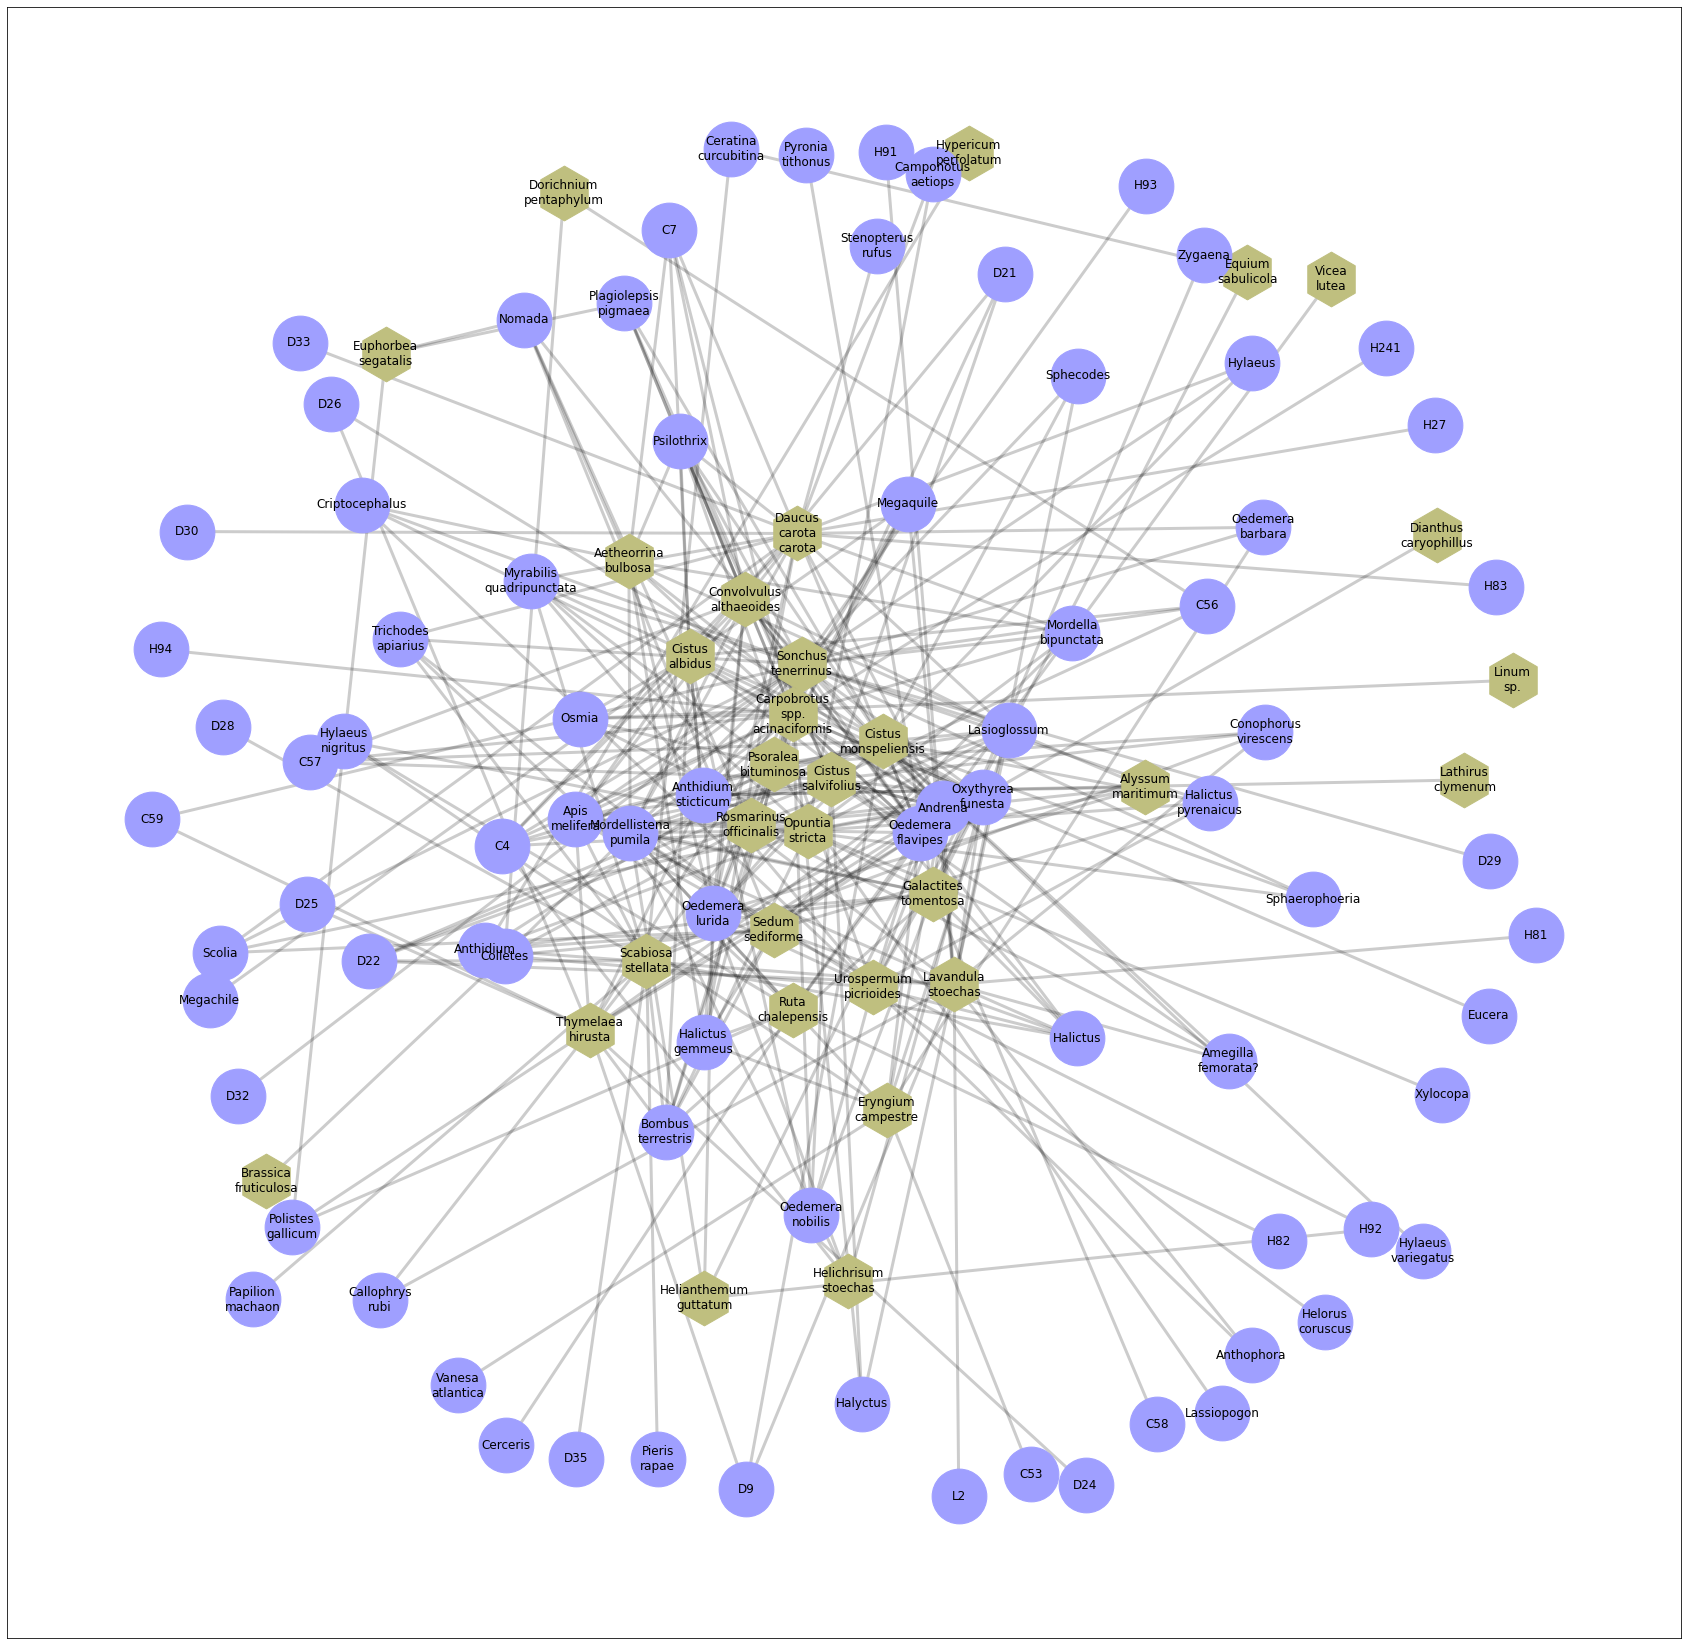

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
pos = nx.spring_layout(B, k=0.9)
nx.draw_networkx_edges(B, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(B, pos, nodelist=plants, node_color="#bfbf7f", node_shape="h", node_size=3000)
nx.draw_networkx_nodes(B, pos, nodelist=pollinators, node_color="#9f9fff", node_size=3000)
nx.draw_networkx_labels(B, pos)


## Projections

{'Urospermum\npicrioides': Text(-0.18453793269182842, -0.2798351713492677, 'Urospermum\npicrioides'),
 'Sonchus\ntenerrinus': Text(-0.23533259238129572, -0.06980716780869876, 'Sonchus\ntenerrinus'),
 'Lavandula\nstoechas': Text(0.36665396732902794, 0.09143881265568743, 'Lavandula\nstoechas'),
 'Aetheorrina\nbulbosa': Text(0.1574687790715101, 0.043716612434490605, 'Aetheorrina\nbulbosa'),
 'Euphorbea\nsegatalis': Text(-0.4320788943393962, 0.4563776994254694, 'Euphorbea\nsegatalis'),
 'Convolvulus\nalthaeoides': Text(-0.0420798574866611, -0.2142691496443182, 'Convolvulus\nalthaeoides'),
 'Carpobrotus\nspp.\nacinaciformis': Text(0.027168787889115996, 0.3299298948408649, 'Carpobrotus\nspp.\nacinaciformis'),
 'Equium\nsabulicola': Text(0.22098558723241016, -0.5701411089189442, 'Equium\nsabulicola'),
 'Daucus\ncarota\ncarota': Text(0.030348779257448298, -0.35693352987776306, 'Daucus\ncarota\ncarota'),
 'Eryngium\ncampestre': Text(0.2111015851488403, -0.09187758398758648, 'Eryngium\ncampestre

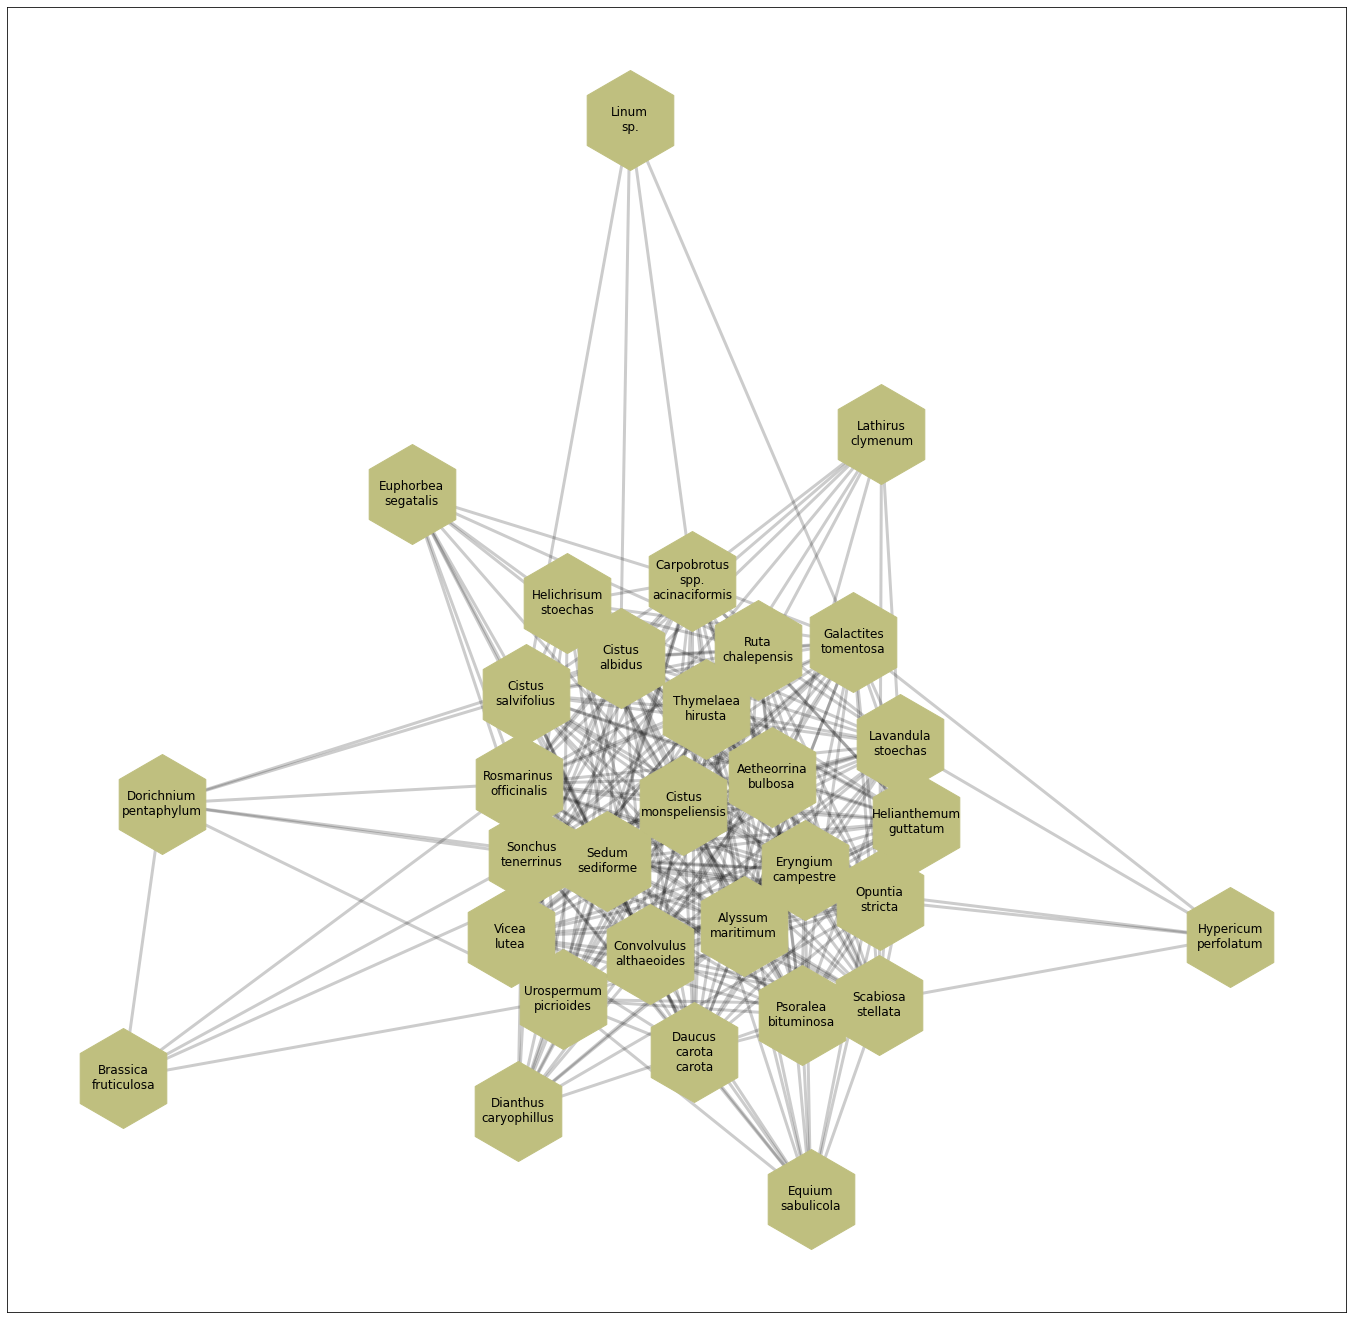

In [7]:
G = bipartite.projected_graph(B, plants)
plt.figure(figsize=(24, 24))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="#bfbf7f", node_shape="h", node_size=10000)
nx.draw_networkx_labels(G, pos)

{'Oedemera\nflavipes': Text(-0.0008371642822595283, -0.20995972389480944, 'Oedemera\nflavipes'),
 'Anthidium\nsticticum': Text(-0.1507397068909409, 0.08010343369014557, 'Anthidium\nsticticum'),
 'Oedemera\nlurida': Text(-0.059796040703972174, 0.005442632444635169, 'Oedemera\nlurida'),
 'Psilothrix': Text(-0.06711366267843513, -0.0926523243451854, 'Psilothrix'),
 'Criptocephalus': Text(-0.21648897892883737, -0.05144409595895084, 'Criptocephalus'),
 'Megaquile': Text(-0.28111862126983234, 0.3072711238798427, 'Megaquile'),
 'Amegilla\nfemorata?': Text(0.03250094346746083, 0.3816773166940656, 'Amegilla\nfemorata?'),
 'Andrena': Text(0.04171393121955461, 0.005986422605467301, 'Andrena'),
 'Apis\nmelifera': Text(0.04389150730504559, 0.09795404146221176, 'Apis\nmelifera'),
 'Polistes\ngallicum': Text(-0.5152712518078668, -0.32301449370276597, 'Polistes\ngallicum'),
 'L2': Text(0.2979504409739296, 0.6854636702038535, 'L2'),
 'C7': Text(-0.2403212170063185, -0.26797860124026474, 'C7'),
 'Lasiog

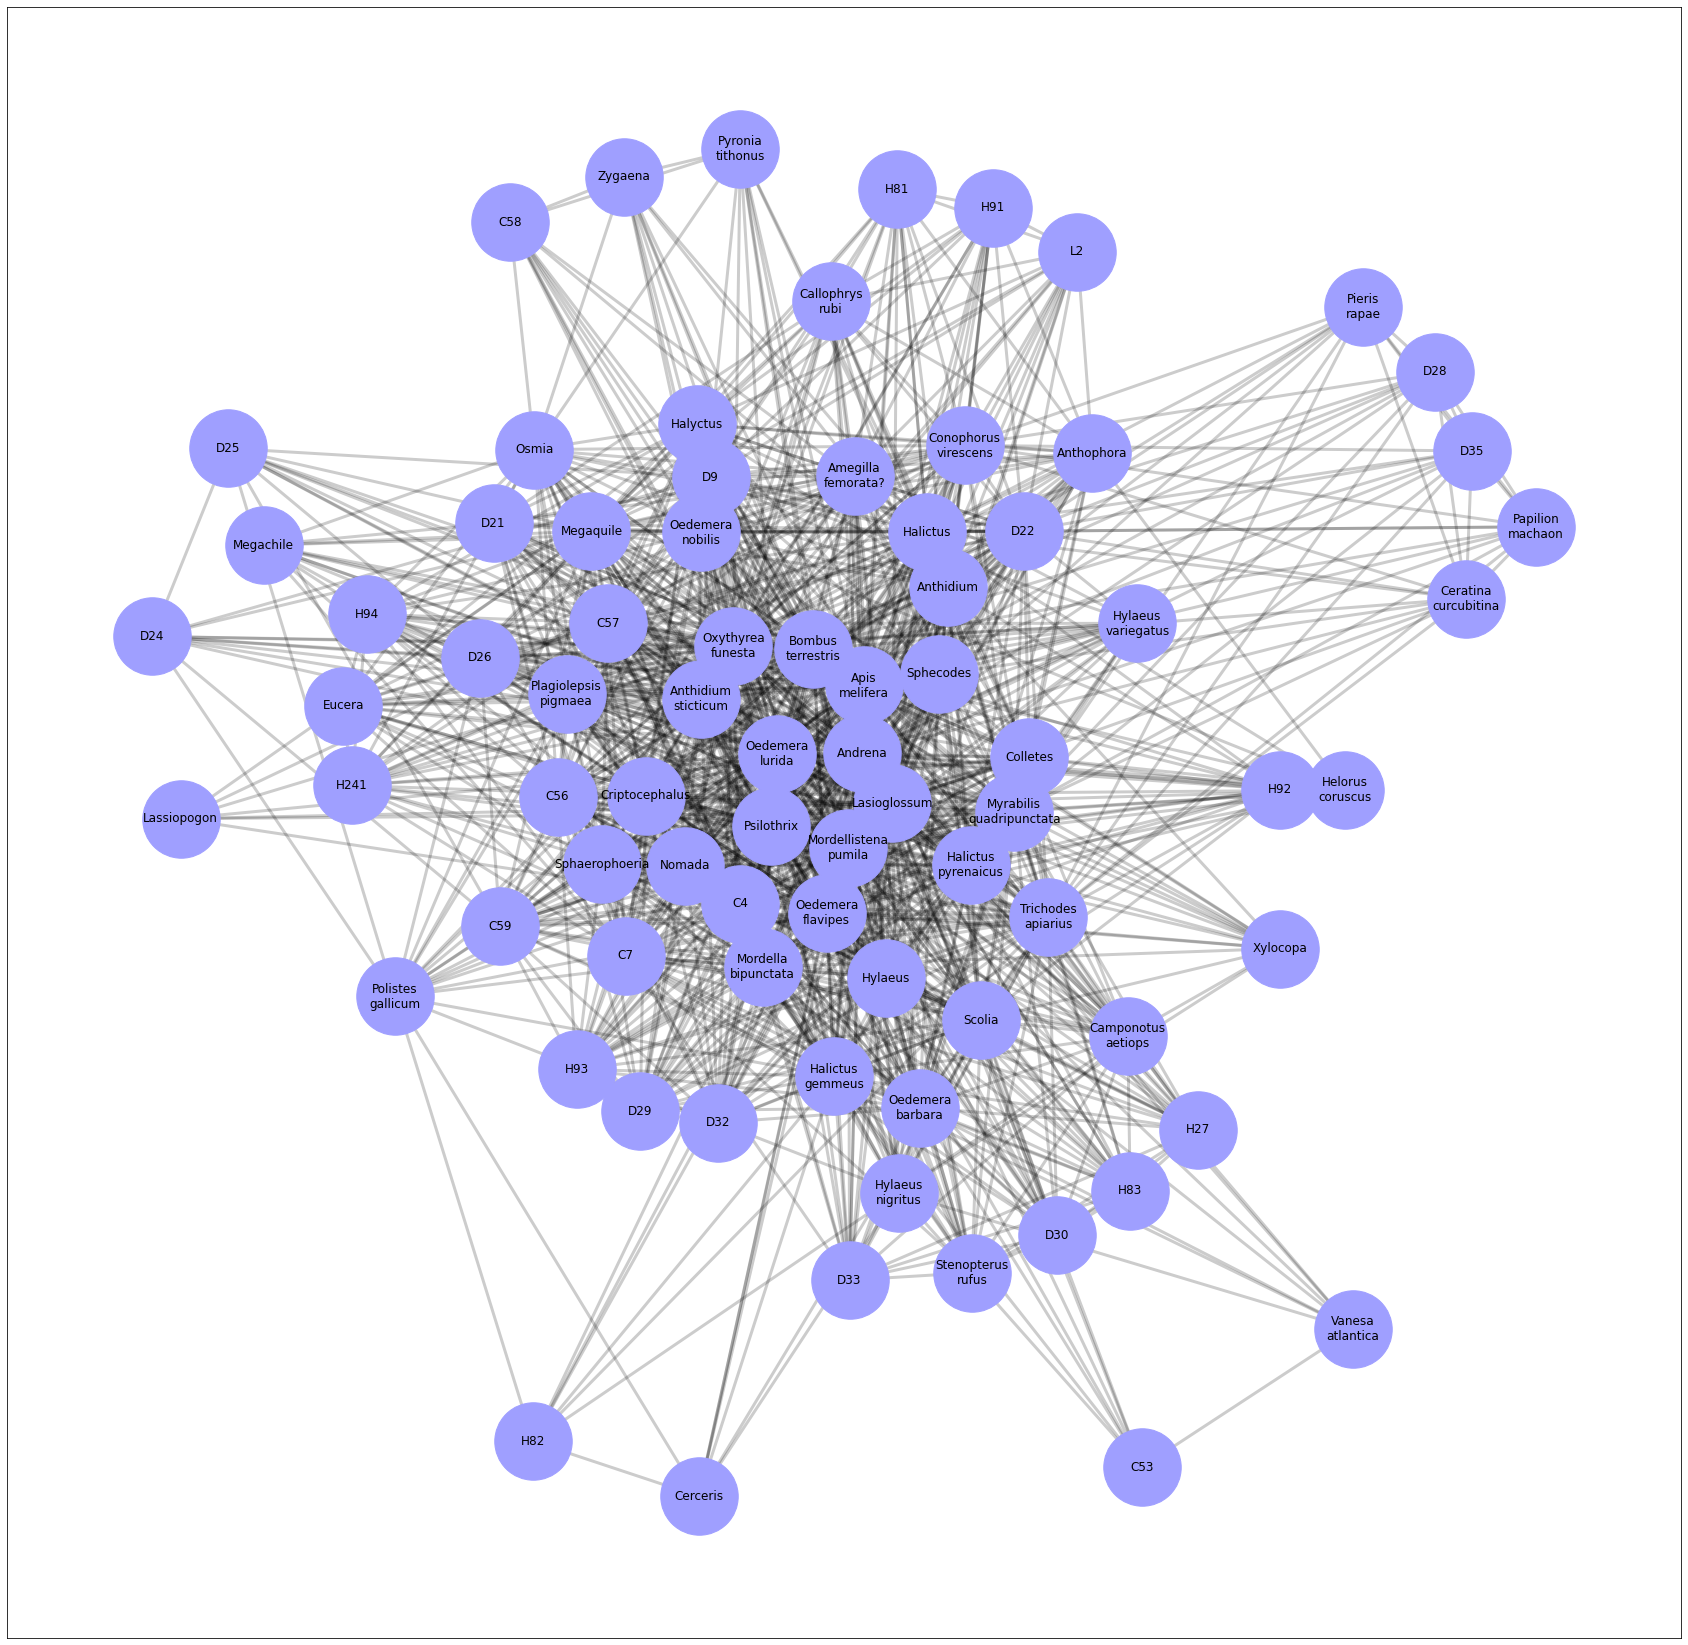

In [8]:
G = bipartite.projected_graph(B, pollinators)
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=6000)
nx.draw_networkx_labels(G, pos)

In [9]:
G = bipartite.weighted_projected_graph(B, plants)
list(G.edges(data=True))[0]

('Urospermum\npicrioides', 'Equium\nsabulicola', {'weight': 1})

{'Oedemera\nflavipes': Text(0.17586202167412004, 0.08763569927377252, 'Oedemera\nflavipes'),
 'Anthidium\nsticticum': Text(-0.19459074670039406, 0.17596406103320456, 'Anthidium\nsticticum'),
 'Oedemera\nlurida': Text(0.09988236701101214, 0.08660240511488901, 'Oedemera\nlurida'),
 'Psilothrix': Text(0.026106284195823705, 0.062351877902994964, 'Psilothrix'),
 'Criptocephalus': Text(0.04020736539670972, 0.17290959662550537, 'Criptocephalus'),
 'Megaquile': Text(-0.37239119414114824, 0.28148016613186805, 'Megaquile'),
 'Amegilla\nfemorata?': Text(-0.4091299399424272, 0.10885307914098857, 'Amegilla\nfemorata?'),
 'Andrena': Text(-0.033223129436119186, 0.02532561175692351, 'Andrena'),
 'Apis\nmelifera': Text(-0.14785675910417226, -0.039769622361372776, 'Apis\nmelifera'),
 'Polistes\ngallicum': Text(0.38254670065493623, 0.6199737228253981, 'Polistes\ngallicum'),
 'L2': Text(-0.8059376364885706, 0.034673273852819035, 'L2'),
 'C7': Text(-0.08994653488314128, -0.12594607478295083, 'C7'),
 'Lasio

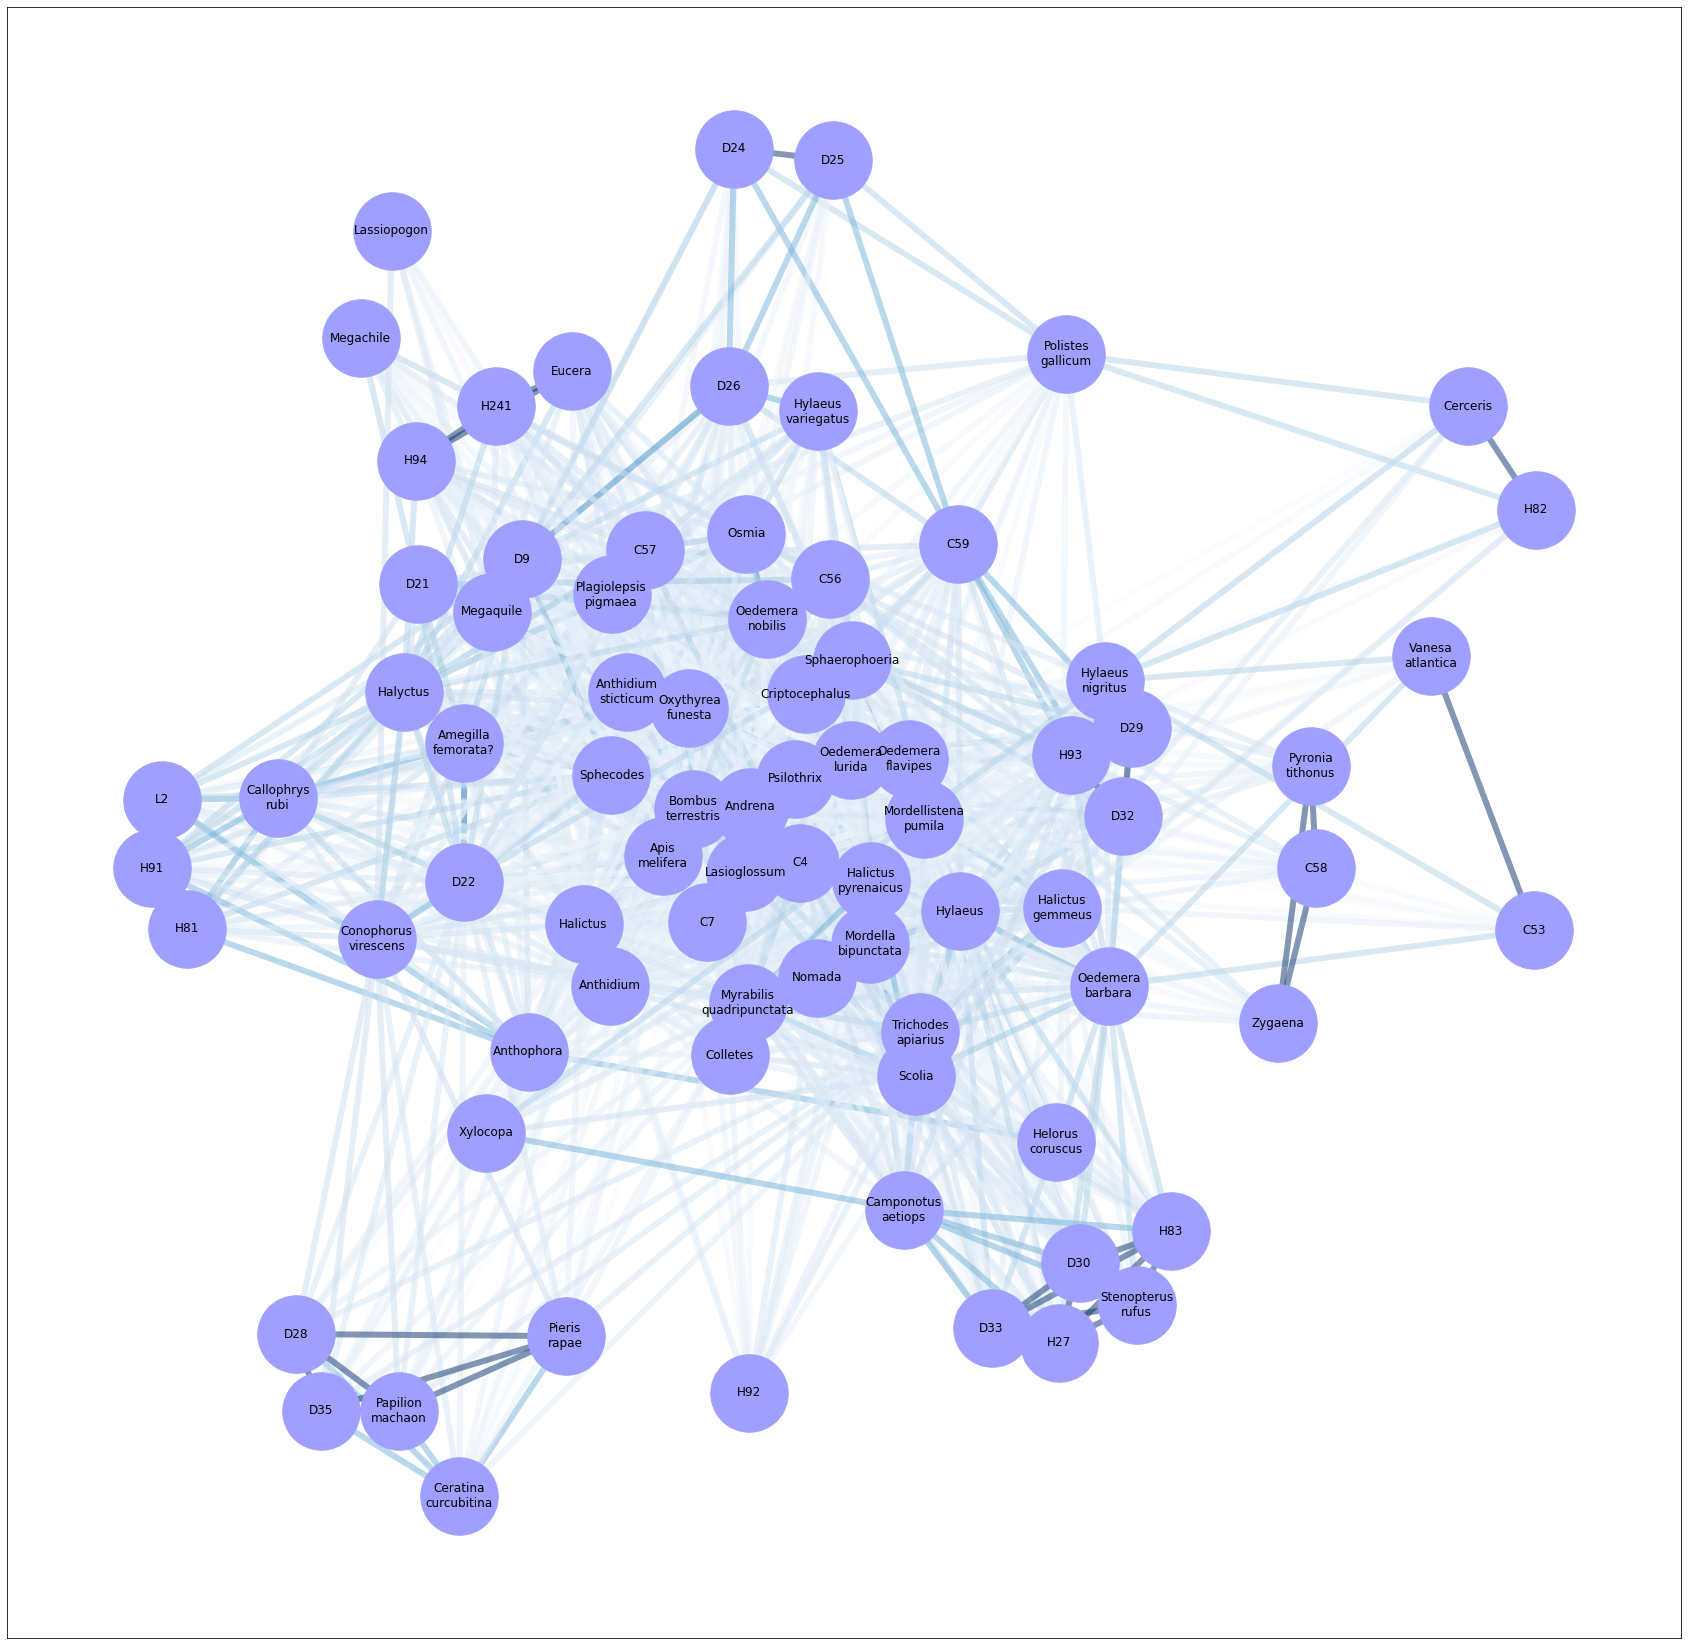

In [10]:
G = bipartite.overlap_weighted_projected_graph(B, pollinators)
weight = [G.edges[e]['weight'] for e in G.edges]
plt.figure(figsize=(30,30))
pos = nx.spring_layout(G, weight='weight', k=0.5)
nx.draw_networkx_edges(G, pos, edge_color=weight, edge_cmap=plt.cm.Blues,
                      width=6, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=6000)
nx.draw_networkx_labels(G,pos)

## Summary

## References